# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Matemática Para Machine Learning</font>

## Hello World Programação Quântica

In [1]:
%matplotlib inline
import qiskit

## API Token

Você precisa acessar o endereço https://quantum-computing.ibm.com/, criar sua conta gratuita e então obter a API Token.

In [ ]:
# Para deletar qualquer conta criada (se necessário)
#from qiskit import IBMQ
#IBMQ.delete_accounts()

In [2]:
from qiskit import IBMQ

# token = "API_TOKEN"
# url = "MY_URL"

token = "b3c2fb760724edcda6cc29f304865feb059df164afa028cbfd21ee8be161d2afb91423bde58ba7d8dec9e4397fbfae4fbe9ca50b73be9af8f3c8bc4eb3c07fe2"
url = "https://api.quantum-computing.ibm.com/api/Hubs/ibm-q/Groups/open/Projects/main"

# Para armazenar suas credenciais localmente:
IBMQ.save_account(token, url, overwrite = True)

In [3]:
# Para carregar a conta salva
IBMQ.load_accounts()

## Listar os backends disponíveis e escolher um

In [4]:
print(IBMQ.backends()) # remote IBM backends

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(ibm-q, open, main)>, <IBMQBackend('ibmqx4') from IBMQ(ibm-q, open, main)>, <IBMQBackend('ibmqx2') from IBMQ(ibm-q, open, main)>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(ibm-q, open, main)>]


In [5]:
# Escolha um backend disponível
# Se este abaixo não estiver disponível, escolha um backend cujo nome contenha '_qasm_simulator' 
backend = IBMQ.get_backend('ibmq_qasm_simulator') 

## Computação Quântica

### Gates Quânticos e Variáveis Quânticas

Em computadores clássicos (por exemplo, laptops, telefones, etc.), todas as interações e informações que geramos acabam sendo compiladas em uma série de bits binários: 0 ou 1. Bits são os blocos de construção fundamentais dos computadores.

Na computação quântica, temos bits quânticos ou qubits. O que torna os qubits únicos é que eles não são binários, o que significa que eles podem estar em um estado 0, 1 ou um estado intermediário especial conhecido como superposição. Enquanto em superposição, um qubit é simultaneamente 0 e 1. Quando medimos o qubit, ele sai de seu estado quântico e retorna 0 ou 1.

Considere esta analogia: uma bola começa como vermelha ou azul (seu estado inicial). Colocamos essa bola dentro de uma caixa fechada e, enquanto dentro da caixa, a bola usa algumas propriedades quânticas para mudar sua cor para roxa - uma combinação intermediária de vermelho e azul (ou seja, superposição). Quando abrimos esta caixa para observar a bola roxa, de repente ela muda de cor novamente e só vemos uma bola vermelha ou azul.

Usamos portais (gates) quânticos para ajudar a mudar o estado de nossos qubits e controlá-los enquanto em superposição. Estas são operações quânticas que são análogas às portas lógicas booleanas clássicas (por exemplo, NOT, AND, XOR, etc.), mas que possuem recursos extras porque são quânticas.

Por exemplo, o gate quantumX altera o estado de um qubit de 0 para 1. O gate de Hadamard, H gate, coloca um qubit em superposição e gera uma chance aleatória de 50/50 de medir um 0 ou 1. Usando qiskit, podemos simplesmente importar essas portas em nosso programa.

Em certo sentido, os estados de superposição são valores que existem a meio caminho entre os extremos de 0 e 1. Podemos imaginar um qubit como uma esfera, com 0 e 1 sentados em lados opostos. Os estados de superposição são todos os outros pontos possíveis na superfície.

![title](qubit.png)

Além de 0 e 1, essa imagem também sinaliza alguns estados de superposição importantes. Um é chamado u3 (0,5 * pi, 0,0) | 0⟩. É certo que não é um nome muito atraente, mas vamos ver o que realmente significa.

Esse modo de pensar sobre qubits faz com que pareçam um pouco com variáveis ​​contínuas. Podemos representar qualquer ponto na superfície de uma esfera (como o ponto ψ na imagem) usando coordenadas polares com apenas alguns ângulos (θ e φ).

Uma diferença importante é que nunca podemos extrair mais do que uma informação binária de um qubit. As próprias leis da física nos impedem de descobrir exatamente o que estão fazendo. Não podemos pedir um qubit para os detalhes exatos do estado de superposição. Nós só podemos forçá-lo a escolher entre dois pontos opostos na esfera (como 0 e 1). Se for algo diferente desses dois estados, terá que decidir aleatoriamente um ou outro.

Portanto, um qubit tem algumas propriedades de uma variável contínua e algumas propriedades de uma variável discreta. Na verdade, não é nenhum dos dois. É uma variável quântica.

## 4 Componentes Principais da Computação Quântica

- Programa Quântico: O ambiente para executar a simulação / experimento.
- Circuito Quântico: O circuito virtual para configurar o experimento.
- Registradores Quânticos: O registrador que consiste em qubits.
- Registradores Clássicos: O registrador contendo bits.

![title](quantum.png)

Para obter a saída de uma computação quântica, medimos os qubits nos quais estamos interessados, e a medida sempre produzirá um bit 0 ou bit 1 clássico. Então nós temos uma entrada clássica em bits, que traduzimos para qubits quânticos, após o qual podemos realizar cálculos quânticos. Então, para obter a saída, realizamos uma medição quântica que nos dá os bits clássicos.

## Execute seu primeiro programa quântico

Para este programa, vamos inserir 5 bits "0" e medir a saída depois da computação quântica. Em seguida, ele não executa nenhuma ação antes de gerar o equivalente clássico dos bits quânticos. Como eles não mudaram, a saída deve ser 00000.

In [9]:
import time
q = qiskit.QuantumRegister(5)
c = qiskit.ClassicalRegister(5)
qc = qiskit.QuantumCircuit(q, c)
qc.measure(q, c)
job_exp = qiskit.execute(qc, backend=backend)

## Visualizando os resultados

Aqui vamos obter a saída 00000 com 100% de probabilidade como nossa saída

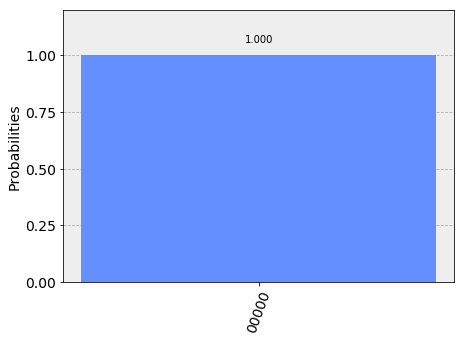

In [10]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(job_exp.result().get_counts(qc))

# Fim